# 10 Image Segmentation

## 10.2 Point, Line, and Edge Detection

### 10.2.2 Detection of Isolated Points

### Example 10.1: Detection of isolated points in an image.

Figure 10.4(b) is an X-ray image of a turbine blade from a jet engine. The blade has a porosity in the upper-right quadrant of the image, and there is a single black pixel embedded within the porosity.

警告: 图像太大，无法在屏幕上显示；将以 67% 显示
> In images.internal.initSize (line 71)
  In imshow (line 336)



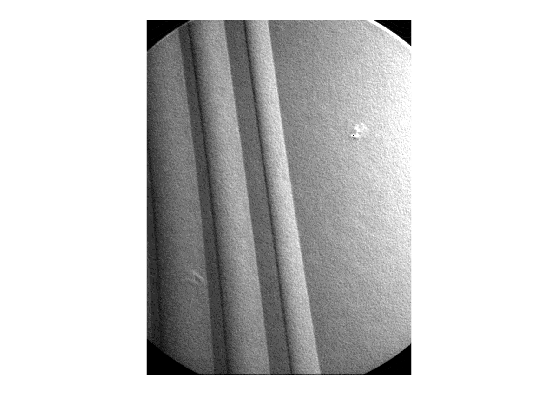

In [1]:
f = imread('Fig1004(b).tif');
imshow(f);

The next image is the result of applying the point detector mask to the X-ray image.

警告: 图像太大，无法在屏幕上显示；将以 67% 显示
> In images.internal.initSize (line 71)
  In imshow (line 336)



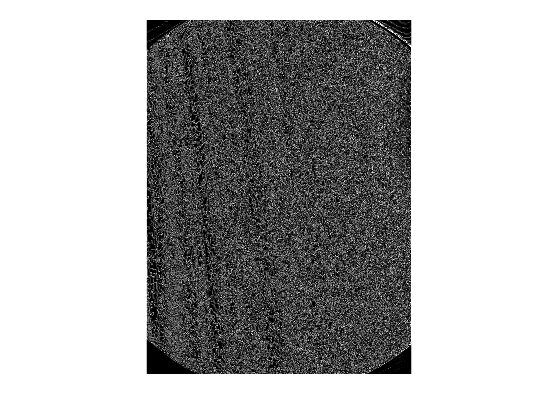

In [4]:
w = [1 1 1; 1 -8 1; 1 1 1];
g = abs(imfilter(tofloat(f), w));
figure, imshow(g);

The next image shows the result of using $T$ equal to $90\%$ of the highest absolute pixel value of the image in the previous figure.

警告: 图像太大，无法在屏幕上显示；将以 67% 显示
> In images.internal.initSize (line 71)
  In imshow (line 336)



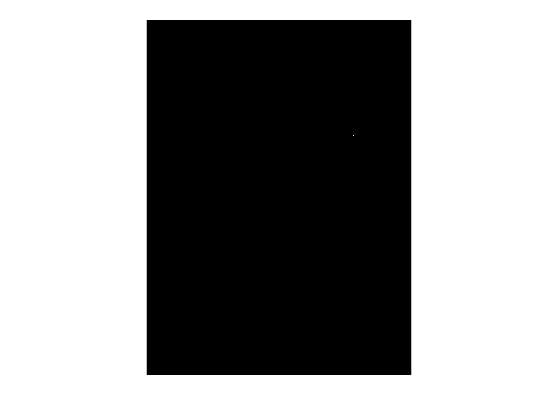

In [5]:
T = max(g(:));
g = g >= 0.9*T;
figure, imshow(g);

### 10.2.3 Line Detection

### Example 10.3: Detecion of lines in specified directions.

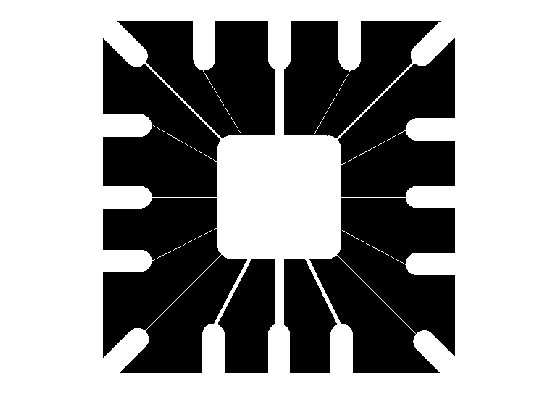

In [12]:
f = imread('Fig1007(a).tif');
imshow(f);

Supposed that we are interested in finding all the lines that are 1 pixel thick and oriented at $+45°$. For this purpose, we use the mask $w$ (show in the code). The next image is the result of filtering the image with that mask. There are two principal segments in the image oriented in the $+45°$ direction, one at the top left and one at the bottom right.

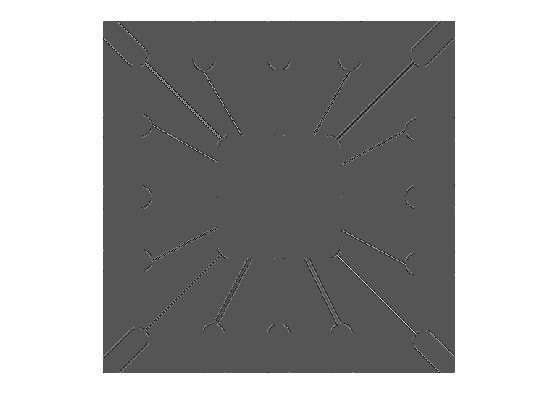

In [13]:
w = [2 -1 -1; -1 2 -1; -1 -1 2];
g = imfilter(tofloat(f), w);
figure, imshow(g, []);

The next image shows the positive values of the previous image.

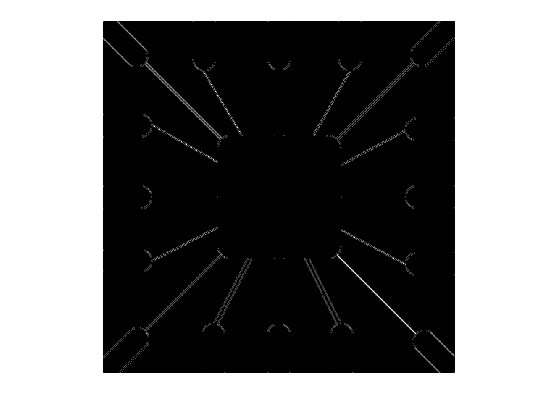

In [14]:
g = abs(g);
figure, imshow(g, []);

Because we are interested in the strongest response, we let $T$ equal the maximum value in the previous image. The next image shows in white the points whose values satisfied the condition $g\geq T$, where $g$ is the previous image.

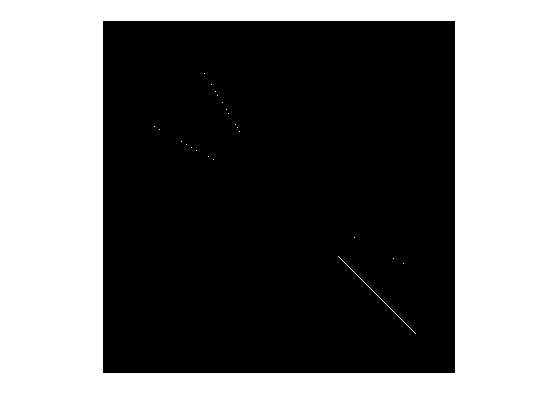

In [15]:
T = max(g(:));
g = g >= T;
figure, imshow(g);

### 10.2.5 Basic Edge Detection

### Gradient operators

### Example 10.6: Illustration of the 2-D gradient magnitude and angle.

警告: 图像太大，无法在屏幕上显示；将以 67% 显示
> In images.internal.initSize (line 71)
  In imshow (line 336)



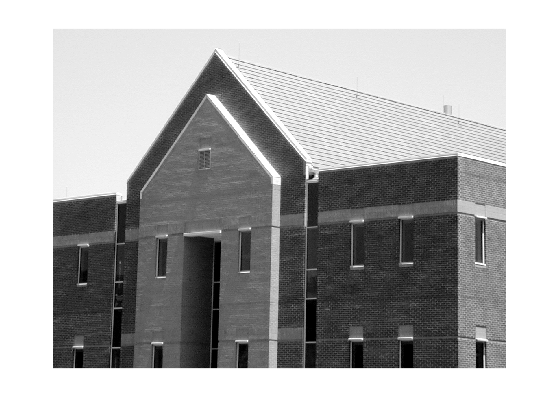

In [27]:
f = tofloat(imread('Fig1016(a).tif'));
imshow(f);

The next two images illustrate the absolute value response of the two components of the gradient, $|g_x|$ and $|g_y|$.

Note, for example, how strong the roof tile, horizontal brick joints, and horizontal segments of the windows are in $|g_x|$ compared to other edges.

By contrast, $|g_y|$ favors features such as the vertical components of the facade and windows.

警告: 图像太大，无法在屏幕上显示；将以 67% 显示
> In images.internal.initSize (line 71)
  In imshow (line 336)



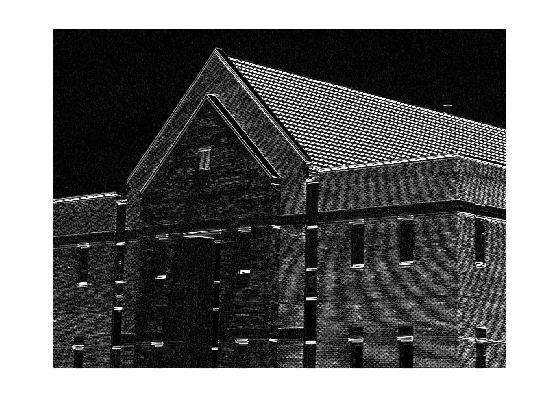

In [32]:
wx = [-1 -2 -1; 0 0 0; 1 2 1];
gx = imfilter(f, wx);
figure, imshow(abs(gx));

警告: 图像太大，无法在屏幕上显示；将以 67% 显示
> In images.internal.initSize (line 71)
  In imshow (line 336)



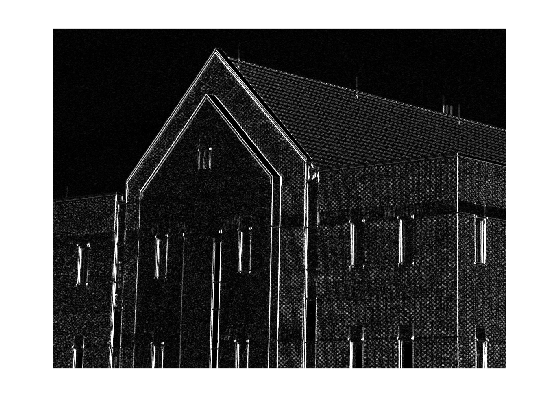

In [33]:
wy = [-1 0 1; -2 0 2; -1 0 1];
gy = imfilter(f, wy);
figure, imshow(abs(gy));

The final image is the gradient image formed from the sum of two components.

$$g=\sqrt{|g_x|^2+|g_y|^2}$$

警告: 图像太大，无法在屏幕上显示；将以 67% 显示
> In images.internal.initSize (line 71)
  In imshow (line 336)



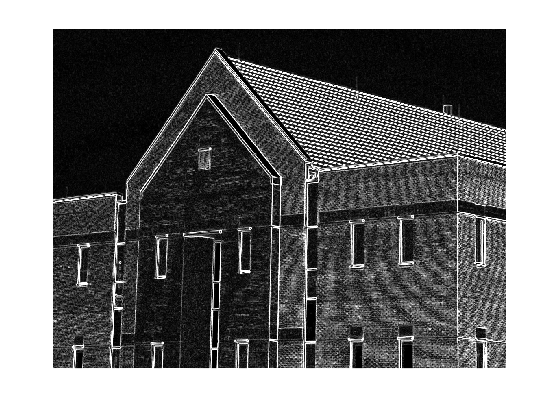

In [34]:
g = sqrt(abs(gx) .^ 2 + abs(gy) .^ 2);
figure, imshow(g);

## 10.3 Thresholding

### 10.3.2 Basic Global Thresholding

### Function `im2bw`

The DIP toolbox function `im2bw` in matlab uses a threshold transformation method to convert a grayscale image into a binary image, which has the basic syntax:

**BW = im2bw(I, T)**

where, $I$ is the intensity image, $T$ is the threshold.

### Example 10.15: Global Thresholding

警告: 图像太大，无法在屏幕上显示；将以 67% 显示
> In images.internal.initSize (line 71)
  In imshow (line 336)



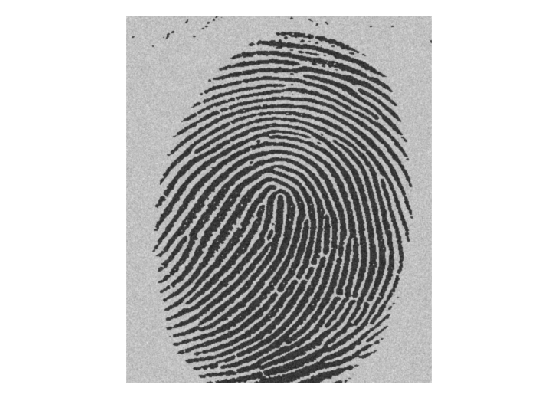

In [46]:
f = imread('Fig1038(a).tif');
imshow(f);

The next image shows the result obtained using $T=125$ to segment the original image. As expected, the segmentation between object and background was quite effective.

警告: 图像太大，无法在屏幕上显示；将以 67% 显示
> In images.internal.initSize (line 71)
  In imshow (line 336)



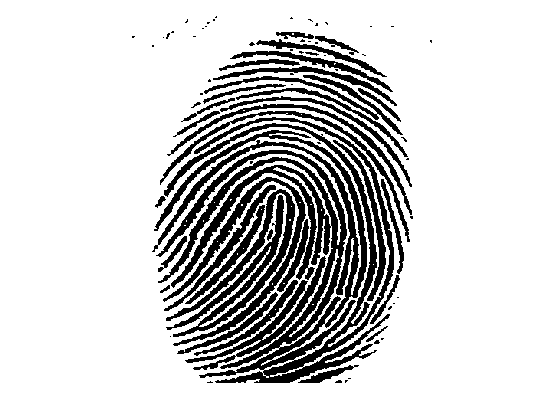

In [47]:
T = 125;
g = im2bw(f, T / 255);
figure, imshow(g);

### 10.3.3 Optimum Global Thresholding Using Otsu's Method

### Function `graythresh`

Toolbox function `graythresh` computes Otsu's threshold. It's syntax is

**[T, SM] = graythresh(f)**

where $f$ is the input image, $T$ is the resulting threshold, normalized to the range $[0,1]$, and $SM$ is the separability measure.

### Example 10.16: Optimum global thresholding using Ostu's method

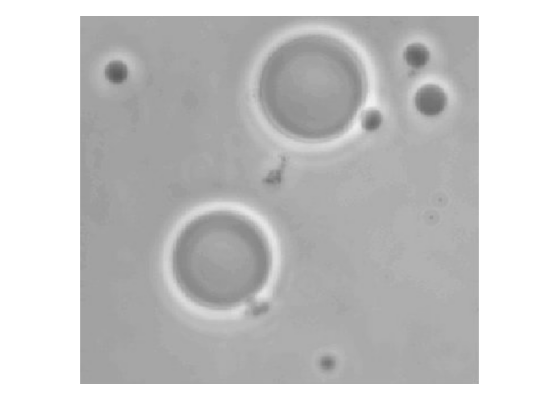

In [56]:
f = imread('Fig1039(a).tif');
imshow(f);

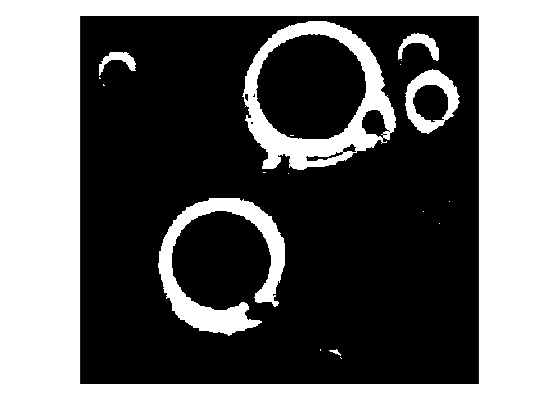

In [59]:
[T, SM] = graythresh(f);
g = im2bw(f, T);
figure, imshow(g);

### 10.3.5 Using Edges to Improve Global Thresholding

### Function `otsuthresh`

There are applications in which it is advantageous to be able to compute Otsu's threshold using the histogram, rather than the image, as in function `graythresh`. The custom function `otsuthresh` computes $T$ and $SM$ given the image histogram.

**[T, SM] = otsuthresh(h)**

### Function `percentile2i`

It is customary to specify the value of $T$ corresponding to a percentile, which typically is set high so that few pixels in the edge image are used in the computation of the threshold. Function `percentile2i` can be used for this purpose. The function computes an intensity value, $I$, corresponding to a specified percentile, $P$. Its syntax is

**I = percentile2i(h, P)**

where, $H$ is the image histogram and $P$ is a percentile value in the range $[0,1]$. Output $I$ is the intensity level corresponding to the $P$th percentile.

### Example 10.18: Using edge information based on the Laplacian to improve global thresholding

Figure 10.43(a) shows an 8-bit image of yeast cells in which we wish to use global thresholding to obtain the regions corresponding to the bright spots.

警告: 图像太大，无法在屏幕上显示；将以 67% 显示
> In images.internal.initSize (line 71)
  In imshow (line 336)



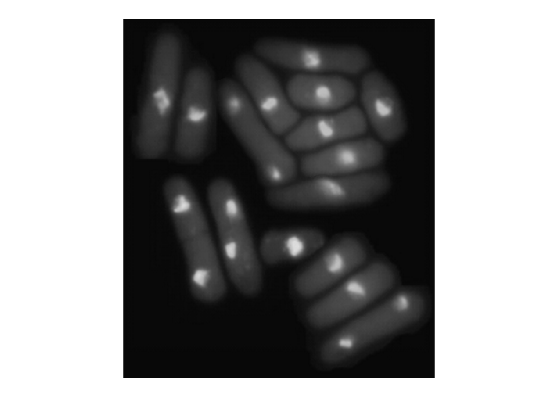

In [64]:
f = tofloat(imread('Fig1043(a).tif'));
imshow(f);

As a starting point, we get the image histogram $hf$. The next image is the result obtained using Otsu's method directly on the image, using the histogram. We see that Otsu's method failed to achieve the original objective of detecting the bright spots, and, although the method was able to isolate some of the cell regions themselves, several of the segmented regions on the right are not disjoint.

警告: 图像太大，无法在屏幕上显示；将以 67% 显示
> In images.internal.initSize (line 71)
  In imshow (line 336)



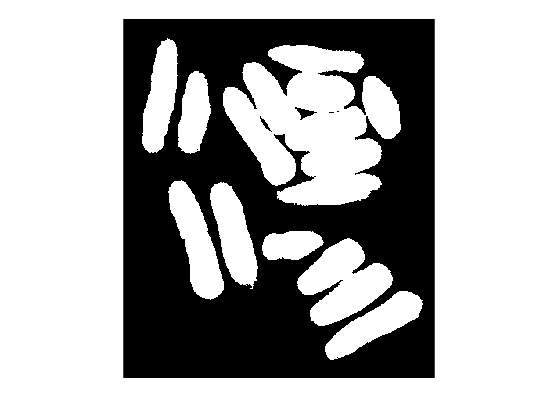

In [65]:
hf = imhist(f);
[Tf, SMf] = graythresh(f);
gf = im2bw(f, Tf);
figure, imshow(gf);

The next image shows the image $g_T(x,y)$ obtained by computing the absolute value of the Laplacian image and then thresholding it with $T$ set to 115 on an intensity scale in the range $[0,355]$. Note in the image how the points cluster near the edges of the bright spots, as expected from the preceding discussion.

警告: 图像太大，无法在屏幕上显示；将以 67% 显示
> In images.internal.initSize (line 71)
  In imshow (line 336)



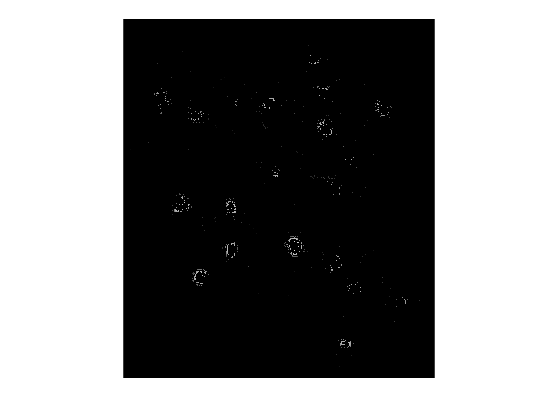

In [67]:
w = [-1 -1 -1; -1 8 -1; -1 -1 -1];
lap = abs(imfilter(f, w, 'replicate'));
lap = lap / max(lap(:));
h = imhist(lap);
Q = percentile2i(h, 0.995);
markerImage = lap > Q;
fp = f .* markerImage;
figure, imshow(fp);

The next image shows the result of globally segmenting the original image using Otsu's method based on the histogram in the previous image. This result agrees with the locatons of the bright spots in the image.

警告: 图像太大，无法在屏幕上显示；将以 67% 显示
> In images.internal.initSize (line 71)
  In imshow (line 336)



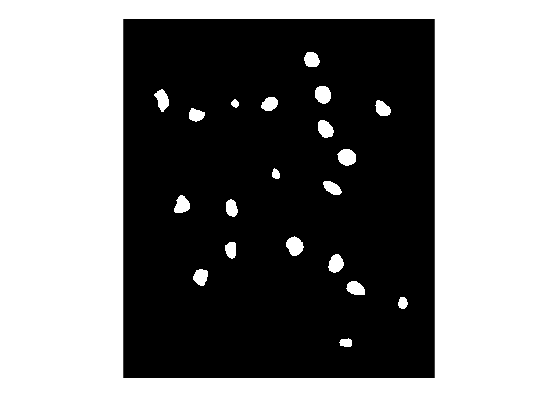

In [69]:
hp = imhist(fp);
hp(1) = 0;
T = otsuthresh(hp);
g = im2bw(f, T);
figure, imshow(g);

### 10.3.7 Variable Thresholding

### Variable thresholding based on local image properties

### Function `stdfilt`

To compute the local standard deviation, we use function `stdfilt`, hwich has the following syntax:

**g = stdfilt(f, nhood)**

where $f$ is the input image and $nhood$ is an array of zeros and ones in which the nonzero elements specify the neighbors used in the computation of the local standard deviation. The size of $nhood$ must be odd in each dimension; the default value is `ones(3)`.

### Function `localthresh`

Function `localthresh` implements local thresholding using the following formulation:

$$
\begin{equation}
  g(x,y)=\left\{
   \begin{array}{l}
   1, \textrm{if} f(x,y)>a\sigma_{xy} \textrm{AND} f(x,y)>bm  \\
   0, \textrm{otherwise}  \\
   \end{array}
  \right.
\end{equation}
$$

which has the following syntax:

**g = localthresh(f, nhood, a, b, meantype)**

### Example 10.21: Variable thresholding based on local image properties.

We want to segment the cells from the background, and the nuclei (inner, brighter regions) from the body of the cells.

警告: 图像太大，无法在屏幕上显示；将以 67% 显示
> In images.internal.initSize (line 71)
  In imshow (line 336)



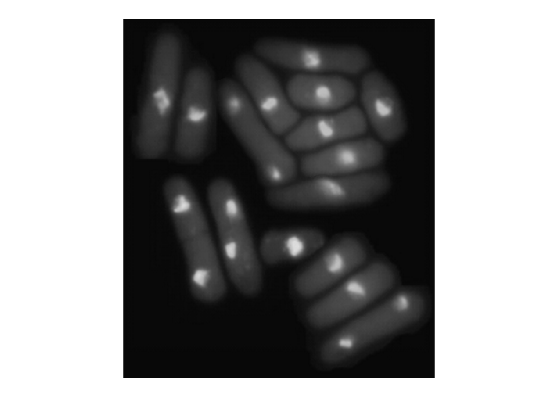

In [70]:
f = tofloat(imread('Fig1048(a).tif'));
imshow(f);

The next image shows the result of using Otsu's method.

警告: 图像太大，无法在屏幕上显示；将以 67% 显示
> In images.internal.initSize (line 71)
  In imshow (line 336)



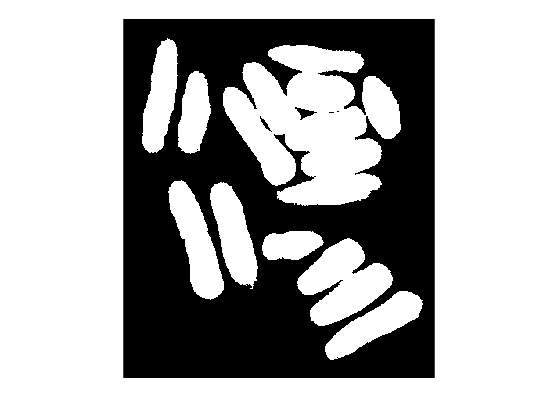

In [72]:
[TGlobal] = graythresh(f);
gGlobal = im2bw(f, TGlobal);
figure, imshow(gGlobal);

Because the nuclei are significantly brighter than the bodies of the cells, we would expect the local standard deviations to be relatively large around the borders of the nuclei and somewhat less around the borders of the cells.

警告: 图像太大，无法在屏幕上显示；将以 67% 显示
> In images.internal.initSize (line 71)
  In imshow (line 336)



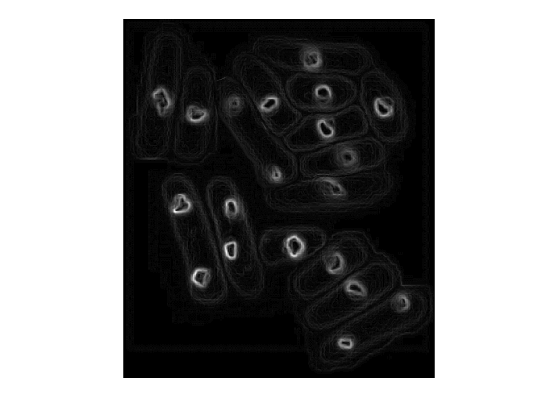

In [73]:
SIG = stdfilt(f, ones(3));
figure, imshow(SIG, []);

As the next image shows, the segmentation using a predicate was quite effective. The cells were segmented individually from the background, and all the nuclei were segmented properly.

警告: 图像太大，无法在屏幕上显示；将以 67% 显示
> In images.internal.initSize (line 71)
  In imshow (line 336)



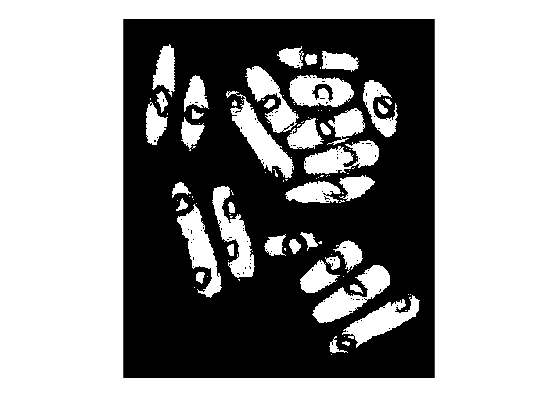

In [74]:
g = localthresh(f, ones(3), 30, 1.5, 'global');
figure, imshow(g);

### Function `movingthresh`

**g = movingthresh(f, n, K)**

Function `movingthresh` segments image $F$ by thresholding its intensities based on the moving average of the intensities along individual rows of the image. The average at pixel $k$ is formed by averaging the intensities of that pixel and its $n-1$ preceding neighbors. To reduce shading bias, the scanning is done in a zig-zag manner, treating the pixels as if they were a 1-D, continuous stream. If the value of the image at a point exceeds $K$ percent of the value of the running average at that point, a 1 is output in that location in $G$. Otherwise a $0$ is output. At the end of the procedure, $G$ is thus the thresholded image. $K$ must be a scalar in the range $[0,1]$.

### Example 10.22: Document thresholding using moving averages.

Figure 10.49(a) shows an image of handwritten text shaded by a spot intensity pattern. This form of intensity shading is typical of images obtained with a photographic flash.

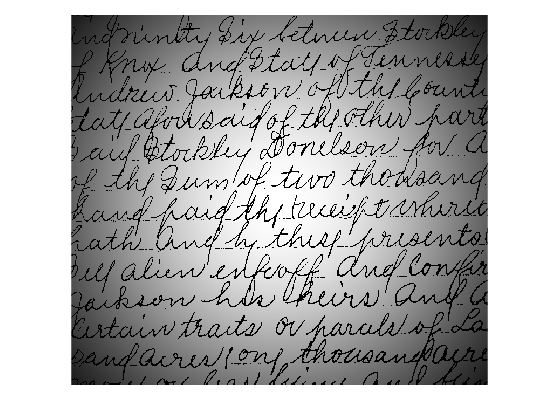

In [75]:
f = tofloat(imread('Fig1049(a).tif'));
imshow(f);

The next image is the result of segmentation using the Ostu global thresholding method. It is not unexpected that global thresholding could not overcome the intensity variation.

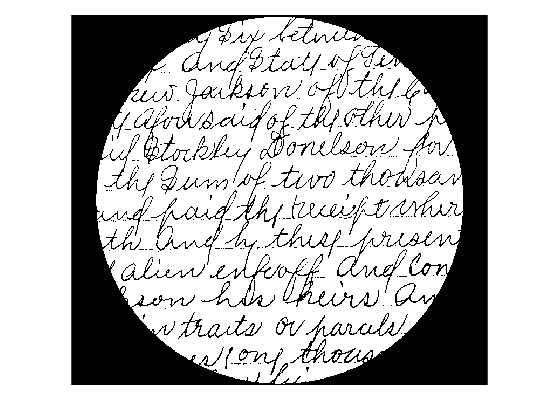

In [76]:
T = graythresh(f);
g1 = im2bw(f, T);
figure, imshow(g1);

The next image shows successful segmentation with local thresholding using moving averages.

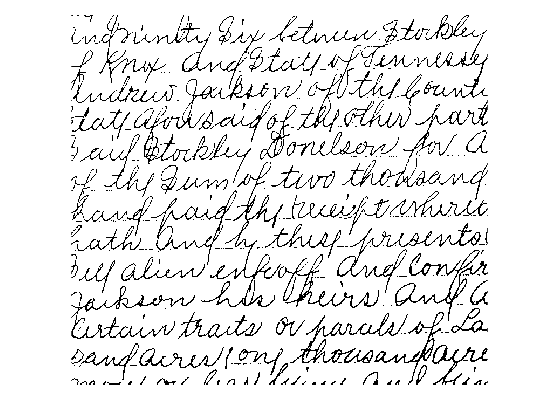

In [77]:
g2 = movingthresh(f, 20, 0.5);
figure, imshow(g2);

As another illustration of the effectiveness of this segmentation approach we used the same parameters as in the previous paragraph to segment the image in Fig. 10.50(a), which is corrupted by a sinusoidal intensity variation that may occur when the power supply in a document scanner is not grounded property.

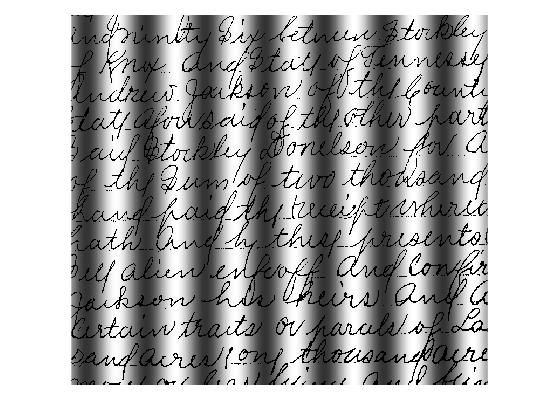

In [99]:
f = tofloat(imread('Fig1050(a).tif'));
figure, imshow(f);

As the next two images show, the segmentation results are comparable to those in Fig. 10.49.

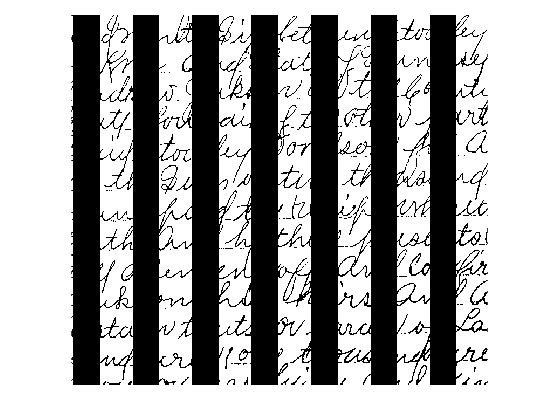

In [100]:
T = graythresh(f);
g1 = im2bw(f, T);
figure, imshow(g1);

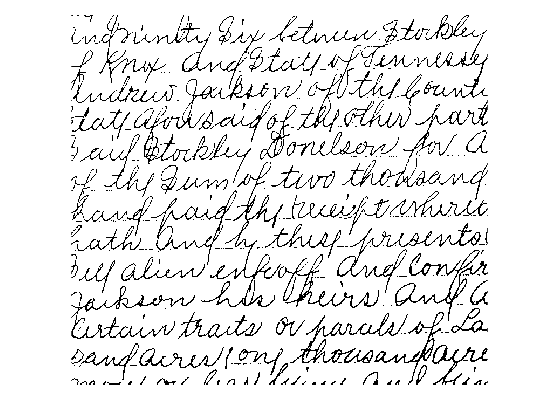

In [101]:
g2 = movingthresh(f, 20, 0.5);
figure, imshow(g2);

## 10.4 Region-Based Segmentation

### 10.4.1 Region Growing

### Function `regiongrow`

To illustrate the principles of how region segmentation can be handled in MATLAB, we develop next an M-function, called `regiongrow`, to do basic growing. The syntax for this function is

**[g, NR, SI, TI] = regiongrow(f, S, T)**

where $f$ is an image to be segmented and parameter $S$ can be an array (the same size as $f$) or a scalar. If $S$ is an array, it must contain 1s at all the coordinates where seed points are located and 0s elsewhere. Such an array can be determined by inspection, or by an external seed-finding function. If $S$ is a scalar, it defines an intensity value such that all the points in $f$ with that value become seed points. Similarly, $T$ can be an array (the same size as $F$) or a acalar. If $T$ is an array, it contains a threshold value for each localtion in $f$. If $T$ is a scalar, it defines a global threshold. The threshold value(s) is (are) used to test if a pixel in the image is sufficiently similar to be seed or seeds to which it is 8-connected. All values of $S$ and $T$ must be scald to the range $[0,1]$, independently of the class of the input image.

In the output, $g$ is the segmented image, with the members of each region being labeled with a different integer value. Parameter $NR$ is the number of regions found. Parameter $SI$ is an image containing the seed points, and parameter $TI$ is an image containing the pixels that passed the threshold test before they were processed for connectivity. Both $SI$ and $TI$ are of the same size as $f$.

### Example 10.23: Segmentation by region growing.

Figure 10.51(a) shows an 8-bit X-ray image of a weld (the horizontal dark region) containing several cracks and porosities (the bright regions sunning horizontally through the center of the image). We illustrate the use of region growing by segmenting the defective weld regions.

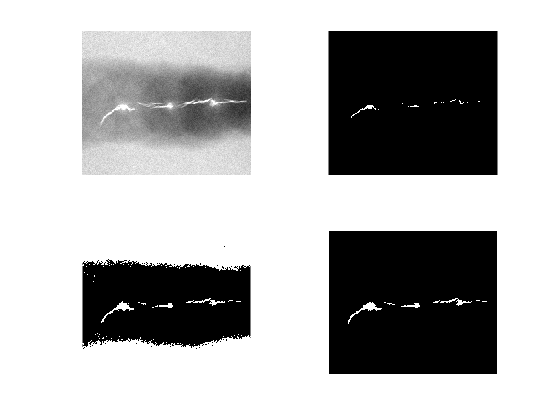

In [97]:
f = imread('Fig1051(a).tif');
f = tofloat(f);
[g, NR, SI, TI] = regiongrow(f, 1, 0.26);
figure
subplot(221), imshow(f);
subplot(222), imshow(SI);
subplot(223), imshow(TI);
subplot(224), imshow(g);

### 10.4.3 Region Splitting and Merging

### Function `splitmerge`

Function `splitmerge` is used to simplify discussed earlier, in which two regions are merged if each satisfies the predicate individually. The function has the following calling syntax:

**g = splitmerge(f, mindim, @predicate)**

where $f$ is the input image and $g$ is the output image in which each connected region is labeled with a different integer. Parameter $mindim$ defines the size of the smallest block allowed in the decomposition; this parameter must be a nonnegative integer power of 2, which allows decomposition down to regions of size $1\times 1$ pixels, although this fine a detail normally is not used in practice.

### Example 10.24: Segmentation by region splitting and merging.

Figure 10.53(a) shows a $566\times 566$ X-ray band image of the Cygnus Loop. The objective of this example is to segment out of the image the "ring" of less dense matter surrounding the dense center.

The second to fourth image show the results varing the minimum size allowed for the quadregions from 32 to 8. The best result in terms of capturing the shape of the outer region was obtained using quadregions of size $16\times 16$.

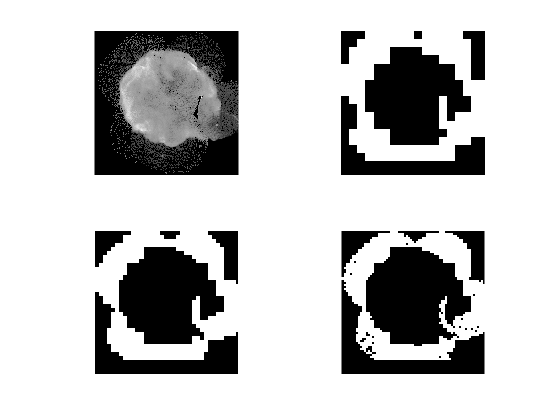

In [102]:
f = imread('Fig1053(a).tif');
g32 = splitmerge(f, 32, @predicate);
g16 = splitmerge(f, 16, @predicate);
g8 = splitmerge(f, 8, @predicate);
figure
subplot(221), imshow(f);
subplot(222), imshow(g32);
subplot(223), imshow(g16);
subplot(224), imshow(g8);